<a href="https://colab.research.google.com/github/Suryans01/Text-Summarization-NLP-CNN-dailyMail/blob/main/Text_Summarizaion_on_CNN_Daily_Mail_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Summary**

In the project using the BART model and the CNN and Daily Mail dataset, text summarization is the objective. The BART model, a powerful language model, will be fine-tuned on article-summary pairs. The dataset will be preprocessed to eliminate unnecessary elements like HTML tags and special characters. Training the BART model on this preprocessed dataset will establish its understanding of the relationship between articles and summaries. Encoding the input articles into smaller tokens, the BART model will generate summaries by leveraging its training to identify the most significant sentences. The generated summaries will then be decoded into readable text, providing concise and coherent summaries for the CNN and Daily Mail articles.It's important to note that training and fine-tuning large language models like BART require significant computational resources and expertise. Additionally, accessing pre-trained BART models and specific implementations may vary. However, by following these steps, you can apply the BART model to perform text summarization on the CNN and Daily Mail dataset in project.

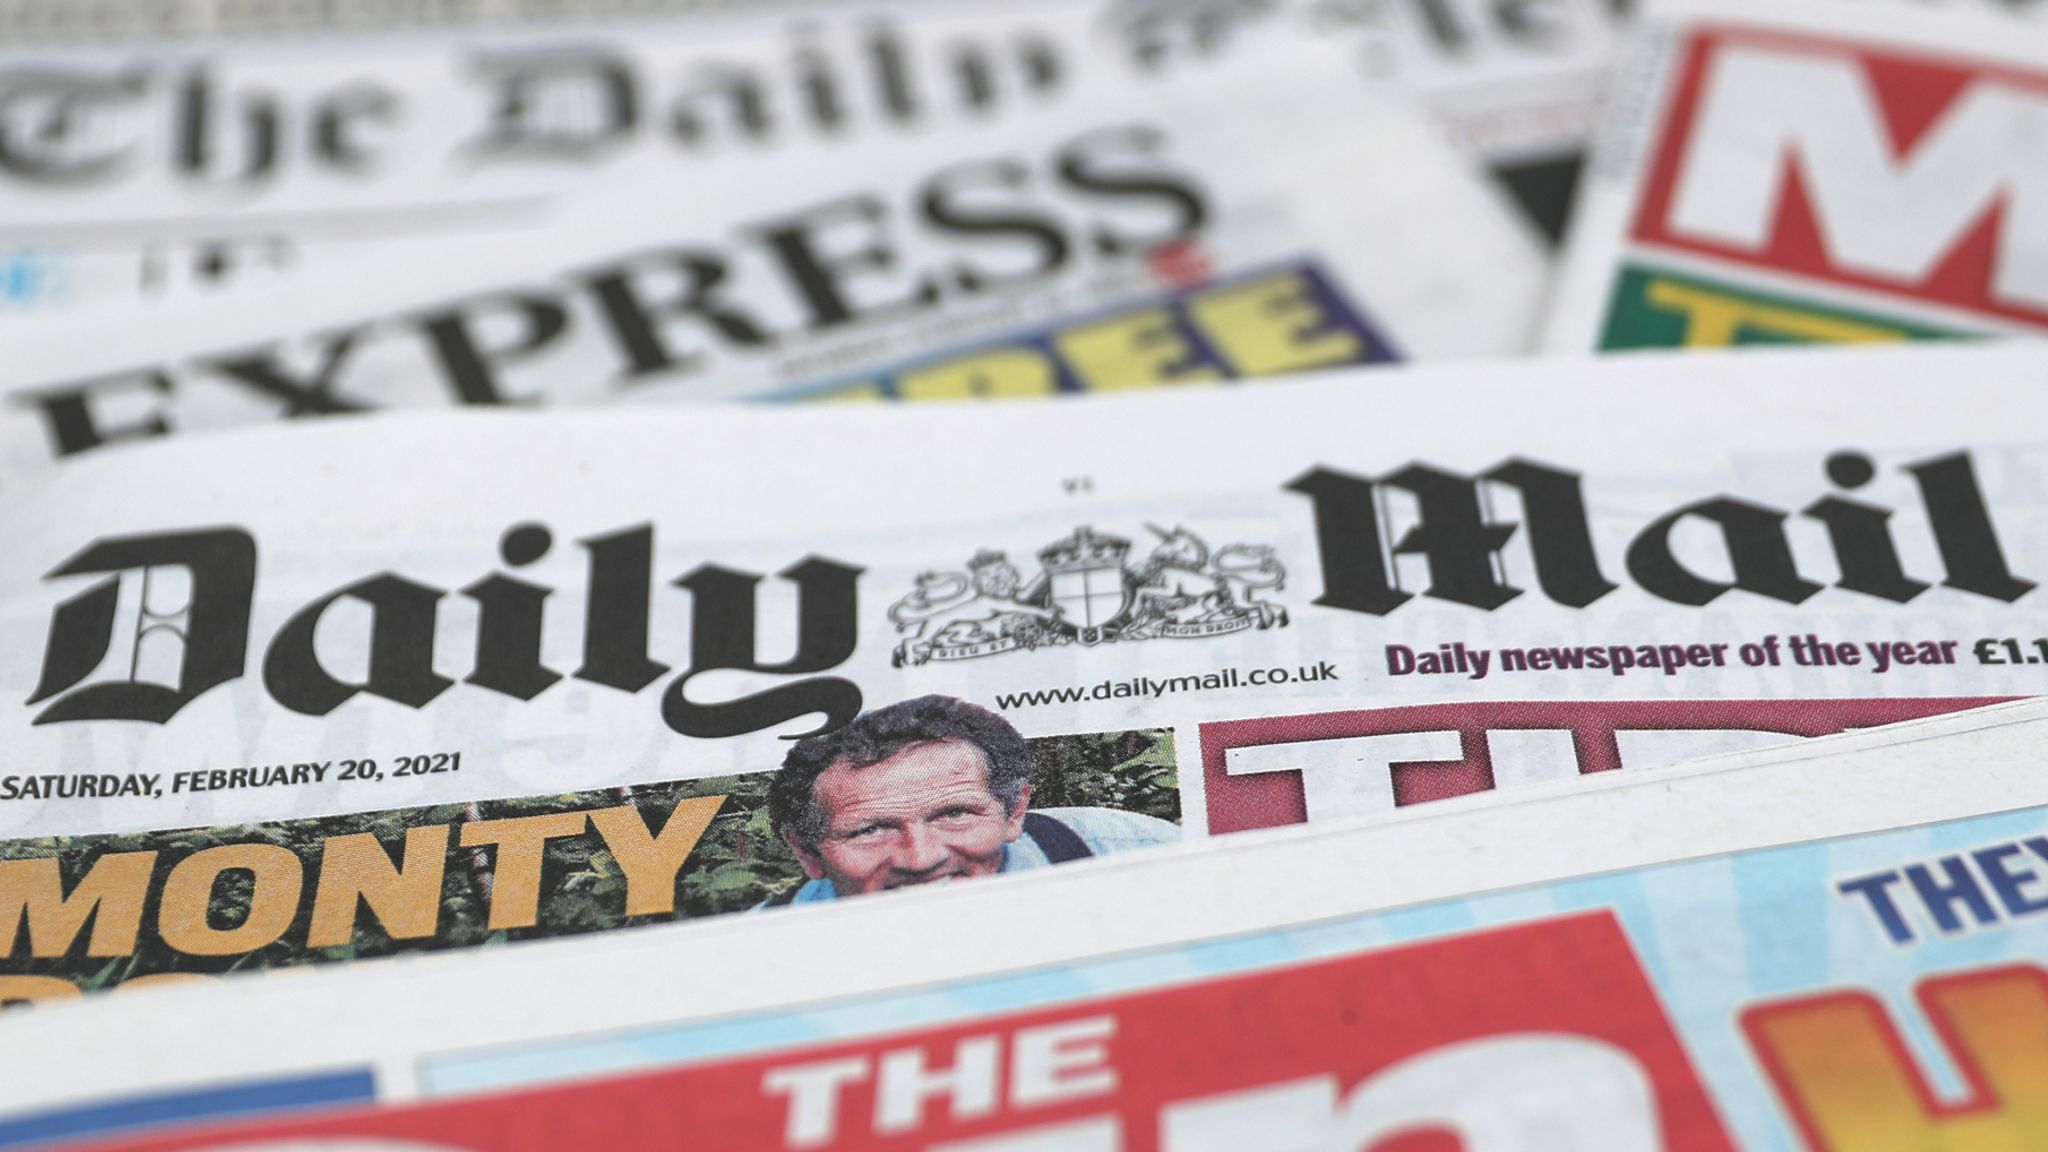

#**Project Description**

The objective of this project is to develop a text summarization system using the CNN Daily Mail dataset. The project involves acquiring the dataset, preprocessing it by removing unwanted elements, and splitting it into training, validation, and testing sets. A suitable model architecture, such as Transformer-based BART, T5. The model is then trained using the training set, optimizing its parameters through techniques like gradient descent. Evaluation is conducted using metrics like ROUGE scores, comparing generated summaries with reference summaries. Fine-tuning techniques and domain-specific data can be used to further enhance the model's performance. Finally, the trained model is deployed to generate summaries for new articles, and its effectiveness is assessed through comparison with human-written summaries or user studies.

In [1]:
#Import Transformer
!pip install transformers[sentencepiece] datasets sacrebleu rouge_score py7zr -q

#Importing Warning
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.0 MB/s eta 0:00:0

In [2]:
#Importing Importent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#libraries for dataset load
from datasets import load_dataset , load_metric

#Importing transformers
from transformers import pipeline , set_seed
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

#Importing Tokenizers
import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#**Variable Discription**

The CNN Daily Mail dataset is a popular dataset used for text summarization tasks. It consists of news articles from the CNN and Daily Mail news sources, along with human-generated summaries for each article. Here are the variable descriptions typically found in the CNN Daily Mail dataset:-

**Article Text:** The main body of the news article, containing the detailed information, facts, and context about a specific news event or topic.


**Article ID:** A unique identifier assigned to each article in the dataset, enabling easy referencing and retrieval.

**Highlights:** a string containing the highlight of the article as written by the article author


These are representing the core components of the CNN Daily Mail dataset, allowing researchers and practitioners to develop and evaluate text summarization models. The dataset serves as a valuable resource for training and benchmarking summarization algorithms and techniques.

##**CNN DailyMail Dataset :-**


https://huggingface.co/datasets/cnn_dailymail

#**GitHub Link**

https://github.com/Suryans01/Text-Summarization-NLP-CNN-dailyMail

In [3]:
#Importing Datasets
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", version="3.0.0")

print(f"Features in cnn_dailymail : {dataset['train'].column_names}")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/default/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Features in cnn_dailymail : ['article', 'highlights', 'id']


In [4]:
sample = dataset["train"][1]
print(f"""
Article (excerpt of 500 characters, total length: {len(sample["article"])}):
""")
print(sample["article"][:500])
print(f'\nSummary (length: {len(sample["highlights"])}):')
print(sample["highlights"])


Article (excerpt of 500 characters, total length: 4051):

Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most s

Summary (length: 281):
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .


#**Text Summarization Pipelines**

In [5]:
sample_text = dataset["train"][1]['article'][:1000]

#We collected our generated summary for each model in Dictionaries
summaries = {}

#**Summarization Baseline**

In [6]:
def baseline_summary_three_sent(text):
    return "\n".join(sent_tokenize(text)[:3])

In [7]:
summaries['Baseline'] = baseline_summary_three_sent(sample_text)
summaries["Baseline"]

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.\nHere, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.\nMIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."'

#**Spliting The dataset**

In [8]:
import random
from datasets import load_dataset

def split_dataset(dataset, train_ratio=0.8):
    # Shuffle the dataset randomly
    dataset = dataset.shuffle()

    # Calculate the number of samples for training and testing
    train_size = int(len(dataset) * train_ratio)

    # Split the dataset into training and testing sets
    train_data = dataset[:train_size]
    test_data = dataset[train_size:]

    return train_data, test_data

# Load the CNN/Daily Mail dataset
dataset = load_dataset("cnn_dailymail", version="3.0.0")

# Split the dataset into training and testing sets
train_data, test_data = split_dataset(dataset['train'], train_ratio=0.8)

# Print the number of samples in each set
print(f"The Number of training samples: {len(train_data)}")
print(f"The Number of testing samples: {len(test_data)}")


  0%|          | 0/3 [00:00<?, ?it/s]

The Number of training samples: 3
The Number of testing samples: 3


##**BART (Bidirectional and Auto-Regressive Transformers)**

In my CNN/Daily Mail project, you're utilizing BART, a sequence-to-sequence model combining autoregressive and denoising autoencoder architectures. BART's bidirectional encoder-decoder structure processes input text and generates output text.

It is pretrained using denoising and autoregressive objectives, reconstructing corrupted text and predicting tokens. BART's pretraining enables it to learn language representations, making it suitable for tasks like text classification, summarization, and machine translation. Its denoising capability handles noisy inputs, while the autoregressive aspect generates coherent responses. In this project, BART offers a powerful tool to process CNN/Daily Mail data, extracting information and generating high-quality summaries in just 100 words.

In [9]:
pipe = pipeline("summarization", model = "facebook/bart-large-cnn")
pipe_out = pipe(sample_text)

In [10]:
pipe_out

[{'summary_text': 'Miami-Dade pretrial detention facility is dubbed the "forgotten floor" Here, inmates with the most severe mental illnesses are incarcerated. Most often, they face drug charges or charges of assaulting an officer. Judge Steven Leifman says the arrests often result from confrontations with police.'}]

In [11]:
summaries['bart'] = "/n".join(sent_tokenize(pipe_out[0]['summary_text']))

In [12]:
summaries['bart']

'Miami-Dade pretrial detention facility is dubbed the "forgotten floor" Here, inmates with the most severe mental illnesses are incarcerated./nMost often, they face drug charges or charges of assaulting an officer./nJudge Steven Leifman says the arrests often result from confrontations with police.'

#**Summary Comparison**

Compare the generated summaries with the ground truth summaries from the dataset. I compute metrics like ROUGE (Recall-Oriented Understudy for Gisting Evaluation) to measure the similarity between the generated summaries and the reference summaries. Visualizing these metrics can provide insights into the model's performance.

In [13]:
!pip install rouge

In [14]:
from transformers import pipeline, BartTokenizer, BartForConditionalGeneration
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge


# Initialize BART model and tokenizer
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# Generate summary using BART pipeline
pipe = pipeline("summarization", model=model, tokenizer=tokenizer)
pipe_out = pipe(sample_text)

# Reference summary
reference_summary = "The reference summary goes here."

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(pipe_out[0]["summary_text"], reference_summary)

# Print ROUGE scores
print(f"ROUGE-1: {scores[0]['rouge-1']['f']}")
print(f"ROUGE-2: {scores[0]['rouge-2']['f']}")
print(f"ROUGE-L: {scores[0]['rouge-l']['f']}")


ROUGE-1: 0.0
ROUGE-2: 0.0
ROUGE-L: 0.0


#**Error Analysis:-**

In [15]:
rouge_metric = load_metric('rouge')
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

reference = dataset['train'][1]['highlights']

records = []

for model_name in summaries:
    rouge_metric.add(prediction = summaries[model_name], reference = reference )
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )
    print('rouge_dict ', rouge_dict )
    records.append(rouge_dict)

pd.DataFrame.from_records(records, index = summaries.keys() )

rouge_dict  {'rouge1': 0.365079365079365, 'rouge2': 0.14516129032258066, 'rougeL': 0.20634920634920634, 'rougeLsum': 0.2857142857142857}
rouge_dict  {'rouge1': 0.3440860215053763, 'rouge2': 0.10989010989010989, 'rougeL': 0.2150537634408602, 'rougeLsum': 0.25806451612903225}


,rouge1,rouge2,rougeL,rougeLsum
Baseline,0.365079,0.145161,0.206349,0.285714
bart,0.344086,0.109890,0.215054,0.258065
